Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [43]:
#your code here
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

db_filename = "dinofunworld.db"
connect = sqlite3.connect(db_filename)
cursor = connect.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables_names = cursor.fetchall()
print(tables_names)
for name in tables_names:
    cursor.execute(f"SELECT * FROM {name[0]}")
    table_cols = [description[0] for description in cursor.description]
    print(table_cols)

[('checkin',), ('attraction',), ('sequences',)]
['index', 'visitorID', 'timestamp', 'attraction', 'duration', 'type']
['index', 'AttractionID', 'Name', 'Region', 'Category', 'type']
['index', 'visitorID', 'sequence']


**Question 1 :** 

Make a Pie Chart of the visits to Thrill Ride attractions.

**Note:** 
* For this question, display the pie chart in the notebook and print the data used to create the pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])
* The pie chart must have the below mentioned parameters,
    * labels
    * title named '**Visits to Thrill Ride attractions**'
    * label with one decimal value inside wedges
    * set aspect ratio of the plot to 'equal'.
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


[['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Auvilotops Express', 18694], ['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['Atmosfear', 27747]]


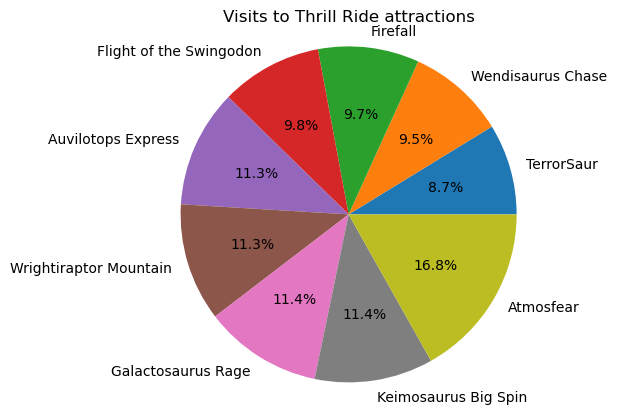

In [45]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
query = """
SELECT attraction.Name, count(checkin.attraction)
FROM checkin, attraction
WHERE attraction.AttractionID = checkin.attraction AND attraction.Category LIKE '%Thrill Rides%'
GROUP BY checkin.attraction
ORDER BY count(checkin.attraction)
"""
cursor.execute(query)
visitor_count = cursor.fetchall()
visitors_list = [[r, v] for (r, v) in visitor_count]
print(visitors_list)
visitors_df = pd.DataFrame.from_records(visitor_count, columns = ['Ride Name', 'Visitors Count'])

plt.pie(visitors_df['Visitors Count'], labels=visitors_df['Ride Name'], autopct='%1.1f%%')
plt.title('Visits to Thrill Ride attractions')
plt.axis('equal')
plt.show()

**Question 2 :** 

Make a bar chart of total visits to food stalls.

**Note:** 
* Please query attractions with category equal to "Food" and order by number of visits.
* For this question, display the bar chart in the notebook and print the data used to create the bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])
* The bar chart should be a **vertical bar plot** and must have the specified parameters listed below,
  * Set x-axis to food stalls, labeling each food stall with names rotated at a 45-degree angle and right horizontal alignment. Set y-axis to number of visits.
  * x-label ('**Food Stalls**') and y-label ('**Number of Visits**')
  * title named '**Total Visits to Food Stalls**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ["Shilobite o'Pizza", 1393], ['Krystal Cook Cafe', 1725], ['Granite Slab Pizza', 2810], ['Plaisantly Popped Corn', 2914], ['Permafrosties', 3018], ['EberTrex Fries', 3018], ['Smoky Wood BBQ', 3037], ['Chensational Sweets', 3049], ['Floral Funnels', 3083], ['Ice Age Cones', 3228]]


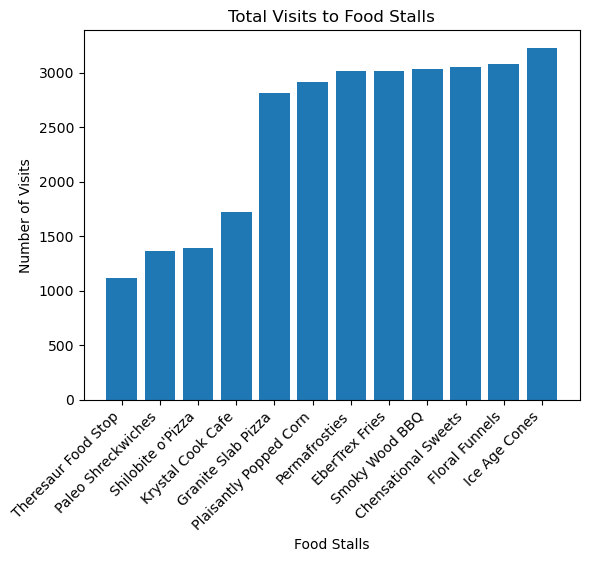

In [47]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
query = """
SELECT attraction.Name, count(checkin.attraction) as Visitors
FROM checkin, attraction
WHERE attraction.AttractionID = checkin.attraction AND attraction.Category LIKE '%Food%'
GROUP BY checkin.attraction
ORDER BY Visitors ASC
"""
cursor.execute(query)
visitor_count = cursor.fetchall()
visitors_list = [[r, v] for (r, v) in visitor_count]
print(visitors_list)
visitors_df = pd.DataFrame.from_records(visitor_count, columns = ['Ride Name', 'Visitors Count'])
# fig, ax = plt.subplots()
# ax.bar(visitors_df['Ride Name'], visitors_df['Visitors Count'])
# ax.set_xlabel('Food Stalls')
# ax.set_ylabel('Number of Visits')
# ax.set_xticks(visitors_df['Ride Name'])
# ax.set_xticklabels(visitors_df['Ride Name'], rotation=45, ha='right')
plt.bar(visitors_df['Ride Name'], visitors_df['Visitors Count'])
plt.xlabel('Food Stalls')
plt.ylabel('Number of Visits')
plt.title('Total Visits to Food Stalls')
plt.xticks(rotation=45, ha='right')
plt.show()

**Question 3 :** 

Make a line chart of attendance at Atmosfear every five minutes.

**Note:** 
* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.
* You only need to consider the first 16 hours of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract the first 192 items (16h * 60m / 5m = 192).
* Display the line chart in the notebook and print the data used to create the chart as a list of lists or tuple lists 
    * The first item in the list is irrelevant, but you can put in some meaningful information and it should be integer.The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (190, 4), (191, 5) ].
* The line chart must have the specified parameters listed below,
  * Set x-axis to the first element in your output list and y-axis to the second item in the list (number of visits)  
  * x-label ('**Time in minutes**') and y-label ('**Number of visits**')
  * title named '**Attendance at Atmosfear every 5 minutes**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

[(0, 0), (5, 0), (10, 9), (15, 19), (20, 49), (25, 62), (30, 46), (35, 44), (40, 33), (45, 75), (50, 81), (55, 98), (60, 75), (65, 89), (70, 80), (75, 85), (80, 52), (85, 82), (90, 80), (95, 103), (100, 108), (105, 93), (110, 68), (115, 90), (120, 89), (125, 117), (130, 108), (135, 81), (140, 89), (145, 94), (150, 87), (155, 85), (160, 82), (165, 97), (170, 100), (175, 137), (180, 142), (185, 134), (190, 109), (195, 138), (200, 142), (205, 157), (210, 164), (215, 176), (220, 78), (225, 73), (230, 62), (235, 77), (240, 73), (245, 99), (250, 118), (255, 109), (260, 108), (265, 106), (270, 100), (275, 134), (280, 90), (285, 83), (290, 78), (295, 96), (300, 95), (305, 102), (310, 133), (315, 97), (320, 110), (325, 121), (330, 134), (335, 102), (340, 101), (345, 114), (350, 103), (355, 123), (360, 87), (365, 111), (370, 140), (375, 129), (380, 103), (385, 94), (390, 53), (395, 43), (400, 53), (405, 76), (410, 78), (415, 53), (420, 73), (425, 82), (430, 104), (435, 91), (440, 84), (445, 89),

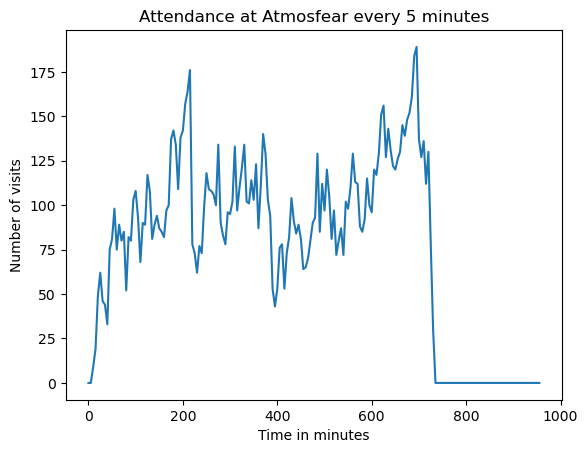

In [49]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
attraction_id = cursor.execute("SELECT AttractionID FROM attraction WHERE Name LIKE '%Atmosfear%'").fetchone()[0]
cursor.execute("SELECT sequence FROM sequences")
sequences = cursor.fetchall()

# extract the first 192 attractions ids from each sequence string
sequences_pruned = np.asarray([tup[0].split('-')[:192] for tup in sequences])
# count the total number of matching attraction id at each time-point in the sequence
total_visits_sequence = np.sum(sequences_pruned == str(attraction_id), axis = 0)
time_range = list(range(0, len(total_visits_sequence)*5, 5))
time_visits_list = zip(time_range, total_visits_sequence.tolist())
print(list(time_visits_list))

x = time_range
y = total_visits_sequence
plt.plot(x,y)
plt.xlabel("Time in minutes")
plt.ylabel("Number of visits")
plt.title("Attendance at Atmosfear every 5 minutes")
plt.show()

**Question 4:**

Make a box plot of total visits to rides in the Kiddie Rides category.

**Note:** 
* The to-be-printed data list must be ordered by AttractionID (a field in the table "attraction").
* For this question, display the box plot in the notebook and print the number of visits to each ride as a list (ex: [3, 4, 5, 6, ...])
* The boxplot chart must have the specified parameters listed below,
  * Set x-axis to Attraction and y-axis to number of visits to each ride.   
  * x-label ('**Attraction**') and y-label ('**Visitor Count**')
  * title named '**Total visits to rides in the Kiddie Rides category**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

[3597, 3759, 4062, 3640, 3747, 3963, 3747, 3925, 3922, 4022, 3877]


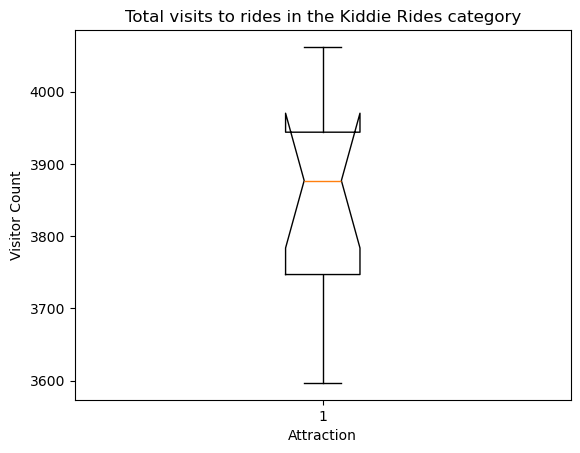

In [51]:
### TEST FUNCTION: test_question4
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
query = """
SELECT attraction.AttractionID, count(checkin.attraction)
FROM checkin, attraction
WHERE attraction.AttractionID = checkin.attraction AND attraction.Category LIKE '%Kiddie Rides%'
GROUP BY checkin.attraction
"""
cursor.execute(query)
ids_and_visitors = cursor.fetchall()
# ids = [id[0] for id in ids]
ids = []
visitors = []

for (i, v) in ids_and_visitors:
    ids.append(i)
    visitors.append(v)
print(visitors)

plt.boxplot(visitors, ids)
plt.xlabel("Attraction")
plt.ylabel("Visitor Count")
plt.title("Total visits to rides in the Kiddie Rides category")
plt.show()